In [16]:
import numpy as np 
import matplotlib.pyplot as plt


x_raw = np.array([0, 2, 4, 6, 8, 9, 10, 12, 14, 15, 16])
X = x_raw.reshape(-1, 1)
y = -1.2 * (x_raw - 8)**2 + 100 + np.random.normal(0, 3, size=len(x_raw))
y = y.reshape(-1, 1)
# Linear Regression model 

w = 0.0 
b = 0.0
learning_rate = 0.001
epochs = 20000
n = len(X)

for epoch in range(epochs):
    y_pred  = w * X + b 
    error = y_pred - y
    
    dw = (2/n) * np.sum(error*X)
    db = (2/n) * np.sum(error)
    
    w = w - learning_rate * dw
    b = b - learning_rate * db

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {np.mean(error**2)} , w: {w}, b: {b}")
    


Epoch 0, Loss: 5482.874313449063 , w: 1.1703188930978097, b: 0.13627455137307837
Epoch 1000, Loss: 1301.6899476855156 , w: 3.3057811039743443, b: 28.519030720740467
Epoch 2000, Loss: 1006.7358312196974 , w: 1.853803195182618, b: 45.447190464681434
Epoch 3000, Loss: 898.8771404797887 , w: 0.9757711831188474, b: 55.68389315176166
Epoch 4000, Loss: 859.435422196547 , w: 0.4448125441886647, b: 61.874175113224254
Epoch 5000, Loss: 845.0123921146605 , w: 0.12373418670148915, b: 65.61752802028609
Epoch 6000, Loss: 839.7381848590557 , w: -0.07042653333947689, b: 67.8811875876601
Epoch 7000, Loss: 837.8095150845944 , w: -0.1878383249714942, b: 69.25005522161953
Epoch 8000, Loss: 837.1042399752464 , w: -0.25883893112567036, b: 70.07782925014776
Epoch 9000, Loss: 836.8463352854691 , w: -0.30177402311418766, b: 70.57839616056808
Epoch 10000, Loss: 836.7520248126799 , w: -0.32773749334234403, b: 70.88109620088413
Epoch 11000, Loss: 836.7175374007392 , w: -0.34343797877433035, b: 71.06414328709721
E

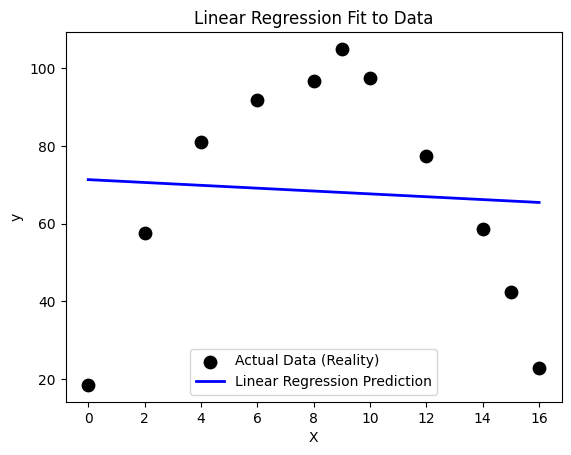

In [17]:
plt.Figure(figsize=(10,6))
plt.scatter(X, y, color='black', label='Actual Data (Reality)', s=80)
plt.plot(X , w * X + b, color='blue', label='Linear Regression Prediction', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit to Data')
plt.legend()
plt.show()


In [19]:
import numpy as np 
import matplotlib.pyplot as plt


x_raw = np.array([0, 2, 4, 6, 8, 9, 10, 12, 14, 15, 16])
x = x_raw.reshape(-1, 1)
x2 = x ** 2
y = -1.2 * (x_raw - 8)**2 + 100 + np.random.normal(0, 3, size=len(x_raw))
y = y.reshape(-1, 1)
# Polynomial Regression model 

#Scaling features 

def scale_data(data):
    mean = np.mean(data)
    std = np.std(data)
    scaled = (data - mean) / std
    return scaled , mean  , std

x_scaled , x_mean , x_std = scale_data(x)
x2_scaled , x2_mean , x2_std = scale_data(x2)

w1 = 0.0 
w2 = 0.0
b = 0.0
learning_rate = 0.01
epochs = 10000
n = len(x)

loss_history=[]

for epoch in range(epochs):
    y_pred  = w1 * x_scaled + w2 * x2_scaled + b 
    error = y_pred - y
    
    dw1 = (2/n) * np.sum(error*x_scaled)
    dw2 = (2/n) * np.sum(error*x2_scaled)
    db = (2/n) * np.sum(error)
    
    w1 = w1 - learning_rate * dw1
    w2 = w2 - learning_rate * dw2
    b = b - learning_rate * db

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {np.mean(error**2)} , w1: {w1}, w2: {w2}, b: {b}")


Epoch 0, Loss: 5389.855281457811 , w1: -0.08053673192305363, w2: -0.22903817454175102, b: 1.3528240797398883
Epoch 1000, Loss: 177.26574270503585 , w1: 48.6092699317274, w2: -56.494193812809335, b: 67.64120387543322
Epoch 2000, Loss: 45.73882797006639 , w1: 73.68082942617707, w2: -81.56575330725902, b: 67.64120398699406
Epoch 3000, Loss: 15.717398482986754 , w1: 85.65897856171817, w2: -93.5439024428001, b: 67.64120398699406
Epoch 4000, Loss: 8.864913345143936 , w1: 91.38164039873021, w2: -99.26656427981214, b: 67.64120398699406
Epoch 5000, Loss: 7.300812189182515 , w1: 94.11569038677246, w2: -102.00061426785439, b: 67.64120398699406
Epoch 6000, Loss: 6.943801210410822 , w1: 95.42190584209916, w2: -103.30682972318111, b: 67.64120398699406
Epoch 7000, Loss: 6.8623123383658875 , w1: 96.04596129945963, w2: -103.93088518054157, b: 67.64120398699406
Epoch 8000, Loss: 6.843712248559089 , w1: 96.34410906082103, w2: -104.22903294190296, b: 67.64120398699406
Epoch 9000, Loss: 6.839466719910347 ,

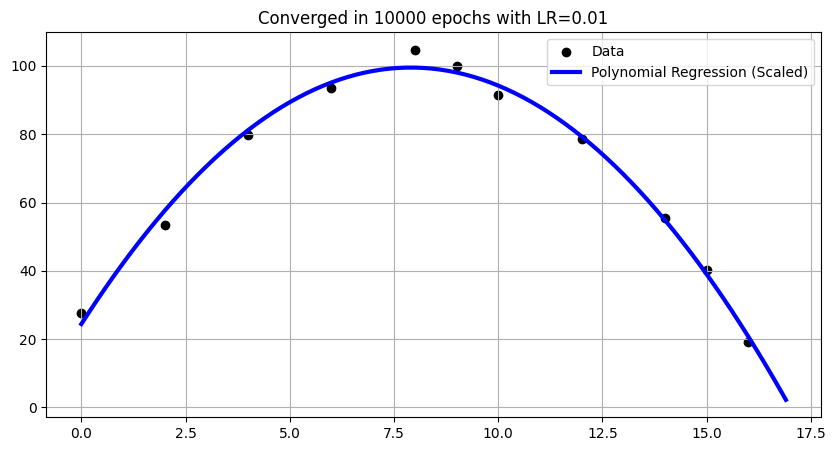

In [20]:
# polynomial linear regression plotting

# Create smooth grid
x_grid = np.arange(0, 17, 0.1).reshape(-1, 1)
x_grid_sq = x_grid ** 2

# SCALE THE GRID using saved statistics
x_grid_scaled = (x_grid - x_mean) / x_std
x_grid_sq_scaled = (x_grid_sq - x2_mean) / x2_std

# Predict
y_pred_line = w1 * x_grid_scaled + w2 * x_grid_sq_scaled + b

# Plot
plt.figure(figsize=(10,5))
plt.scatter(x, y, color='black', label='Data')
plt.plot(x_grid, y_pred_line, color='blue', linewidth=3, label='Polynomial Regression (Scaled)')
plt.title(f'Converged in {epochs} epochs with LR={learning_rate}')
plt.legend()
plt.grid(True)
plt.show()